# $k$-Means Clustering
*Curtis Miller*

Here I demonstrate clustering using the $k$-means algorithm.

## Clustering the Iris Dataset

The first example will demonstrate using $k$-means clustering for the iris dataset. I first load in that dataset.

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris_obj = load_iris()
iris_data = iris_obj.data
species = iris_obj.target
iris_data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

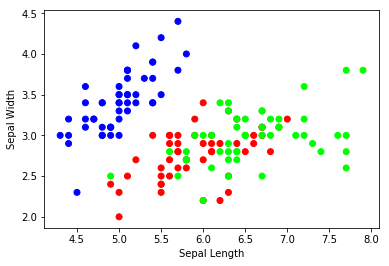

In [3]:
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=species, cmap=plt.cm.brg)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

Next I import the `KMeans` object to perform $k$-means clustering, and then apply the method.

In [4]:
from sklearn.cluster import KMeans

In [5]:
irisclust = KMeans(n_clusters=3, init='random')    # Three clusters with cluster centers chosen as random dataset points
irisclust.fit(iris_data)
irisclust.cluster_centers_    # The coordinates of cluster centers

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

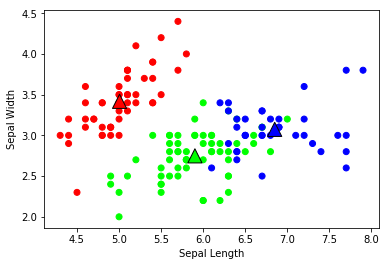

In [6]:
# Visualizing the clustering
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=irisclust.predict(iris_data), cmap=plt.cm.brg)
plt.scatter(irisclust.cluster_centers_[:, 0], irisclust.cluster_centers_[:, 1],
            c=irisclust.predict(irisclust.cluster_centers_), cmap=plt.cm.brg, marker='^', s=200,
            edgecolors='k')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

## Image Compression with $k$-Means

$k$-means can also be used for image compression. An image is first clustered using the $k$-means algorithm, each pixel being assigned to a cluster (often pixels are represented using RGB values). The number of clusters is the number of unique colors that need to be stored. Additionally, we would need to store the dimensions of the image and which color each pixel of the image is.

I demonstrate this approach with an image of a poison dart frog, which we will compress with $k$-means into ten unique colors.

In [7]:
from sklearn.datasets import load_sample_image
from PIL import Image
import numpy as np

In [9]:
frog = np.array(Image.open("frog.png").convert("RGB")) / 255    # The last division to force numbers to be in [0,1]

In [10]:
frog.shape

(750, 1024, 3)

In [11]:
frog[:5, :5, 0]

array([[0.61568627, 0.6       , 0.6       , 0.60392157, 0.6       ],
       [0.61568627, 0.60784314, 0.6       , 0.60392157, 0.60392157],
       [0.61176471, 0.60784314, 0.6       , 0.6       , 0.6       ],
       [0.61176471, 0.60784314, 0.6       , 0.60392157, 0.6       ],
       [0.61568627, 0.61176471, 0.60784314, 0.60784314, 0.60392157]])

In [12]:
frog[:5, :5, 1]

array([[0.52156863, 0.51764706, 0.51764706, 0.52156863, 0.51764706],
       [0.5254902 , 0.51764706, 0.51764706, 0.52156863, 0.52156863],
       [0.52156863, 0.51764706, 0.51764706, 0.51764706, 0.51764706],
       [0.52156863, 0.51764706, 0.51764706, 0.52156863, 0.51764706],
       [0.5254902 , 0.52156863, 0.5254902 , 0.5254902 , 0.52156863]])

In [13]:
frog[:5, :5, 2]

array([[0.41176471, 0.40392157, 0.40392157, 0.40784314, 0.41176471],
       [0.40392157, 0.39607843, 0.39607843, 0.40784314, 0.40784314],
       [0.4       , 0.39607843, 0.39607843, 0.40392157, 0.40392157],
       [0.4       , 0.39607843, 0.39607843, 0.4       , 0.40392157],
       [0.4       , 0.4       , 0.40392157, 0.40392157, 0.4       ]])

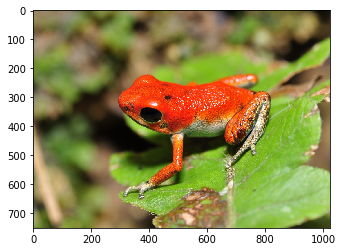

In [14]:
plt.imshow(frog)

In [15]:
def kmeans_compression(img, n_clusters):
    """Recolors an image when colors are clustered using the k-means algorithm"""
    h, w, d = img.shape
    assert d == 3
    img_data = img.reshape(h * w, d)    # The new array should have a row per pixel
    img_clust = KMeans(n_clusters=n_clusters, init='random').fit(img_data)    # The actual k-means clustering step
    centroids = img_clust.cluster_centers_    # The RGB (normalized) values for the new pixels
    clust_pixels = img_clust.predict(img_data)    # Which pixel gets which new value
    new_img_data = centroids[clust_pixels]
    return new_img_data.reshape(h, w, d)

In [16]:
newfrog = kmeans_compression(frog, 10)

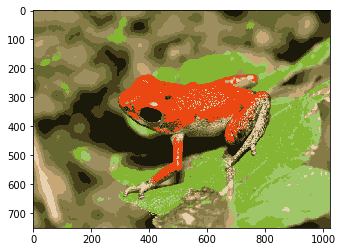

In [17]:
plt.imshow(newfrog)

While the original image would need more memory to store each pixel's unique color, the latter has less information and thus would need less memory to store, although the quality of the image is not the same.